# Metadata

```yaml
Course:    DS 5001
Module:    M12 Lab
Topic:     Implementing Naive Bayes in SciKit Learn
Author:    R.C. Alvarado
Date:      19 April 2023
```

# Config

In [1]:
class Params:
    min_df = 5
    test_size = 0.25
    a_cut = 93
    b_cut = 84

# Import

In [2]:
import pandas as pd
import numpy as np
import plotly_express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, CategoricalNB

# Get raw data

In [3]:
DOC = pd.read_csv("../data/winereviews/winereviews.csv").set_index('doc_id')

In [4]:
V = pd.read_csv("../data/winereviews/winereviews-VOCAB.csv").term_str.values

In [5]:
V

array(['aaron', 'abbey', 'abbott', ..., 'zweigelt', 'émilion', 'über'],
      dtype=object)

In [6]:
DOC

,doc_content,points
doc_id,,
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87
...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,90
129967,Citation is given as much as a decade of bottl...,90
129968,Well-drained gravel soil gives this wine its c...,90


# Filter out middle

In [7]:
DOC = DOC.loc[(DOC.points >= Params.a_cut) | (DOC.points <= Params.b_cut)].copy()

# Thunk ratings to labels

In [8]:
DOC.loc[DOC.points >=90, 'label'] = 'P'
DOC.loc[DOC.points <90, 'label'] = 'N'

In [9]:
DOC

,doc_content,points,label
doc_id,,,
336,"Gritty, heavily roasted aromas of peanuts and ...",83,N
337,"An easy and inviting selection, there's a ment...",83,N
338,The wine is earthy and somewhat rustic. There ...,82,N
339,"Red in color, with berry and apple aromas, thi...",82,N
340,"The nose is muted, despite the slight spritz o...",82,N
...,...,...,...
129678,There's a stunning amount of action on the nos...,93,P
129679,From a ranch planted originally in 1926 this i...,93,P
129680,Old vines in a field blend give a rich structu...,93,P


# Convert docs to count matrix

In [10]:
count_engine = CountVectorizer(stop_words='english', min_df=Params.min_df, vocabulary=V)

In [11]:
count_model = count_engine.fit_transform(DOC.doc_content)

In [12]:
DTM = pd.DataFrame(count_model.toarray(), columns=count_engine.get_feature_names_out(), index=DOC.index)

In [13]:
DTM

,aaron,abbey,abbott,abbreviated,ability,able,abound,abounds,abrasive,abrupt,...,zing,zingy,zinny,zins,zip,zippy,zone,zweigelt,émilion,über
doc_id,,,,,,,,,,,,,,,,,,,,,
336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(DTM, DOC.label, test_size=Params.test_size, random_state=0)

# Fit model

In [15]:
mnb_engine = MultinomialNB(force_alpha=True)

In [16]:
mnb_model = mnb_engine.fit(X_train, y_train)

# Test model

In [17]:
y_predict = pd.DataFrame(mnb_engine.predict(X_test), index=X_test.index)

# Evaluate model

In [18]:
RESULT = pd.concat([y_test, y_predict], axis=1)
RESULT.columns = ['actual', 'predicted']
RESULT['validity'] = (RESULT.actual == RESULT.predicted).astype('str').str[0]

In [19]:
RESULT

,actual,predicted,validity
doc_id,,,
33313,N,N,T
124580,N,N,T
127027,N,N,T
100482,N,N,T
61771,N,N,T
...,...,...,...
112450,P,P,T
40342,P,P,T
112684,P,P,T


In [20]:
RESULT.value_counts('validity')

validity
T    5866
F     202
dtype: int64

In [21]:
TALLY = RESULT.value_counts(['validity', 'predicted'])

In [22]:
TALLY

validity  predicted
T         P            3049
          N            2817
F         P             139
          N              63
dtype: int64

In [23]:
CONFUSION = RESULT.value_counts(['predicted','actual']).unstack()

In [24]:
CONFUSION

actual,N,P
predicted,,
N,2817,63
P,139,3049


In [25]:
R = pd.DataFrame(
    dict(
        test_size = Params.test_size,
        a_cut = Params.a_cut,
        b_cut = Params.b_cut,
        TP = TALLY.loc[('T','P')],
        TN = TALLY.loc[('T','N')],
        FP = TALLY.loc[('F','P')],
        FN = TALLY.loc[('F','N')]
    ),
    index=['mnb']
)

In [26]:
R

,test_size,a_cut,b_cut,TP,TN,FP,FN
mnb,0.25,93,84,3049,2817,139,63


In [27]:
R['P'] = R.TP + R.FN
R['N'] = R.TN + R.FP

**accuracy** 

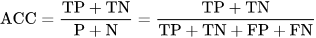

In [28]:
R['ACC'] = (R.TP + R.TN) / (R.P + R.N)

**sensitivity, recall, hit rate, or true positive rate (TPR)**

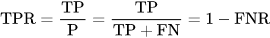

In [29]:
R['TPR'] = R.TP / R.P

**specificity, selectivity or true negative rate (TNR)**

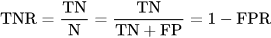

In [30]:
R['TNR'] = R.TN / R.N

**precision or positive predictive value (PPV)**

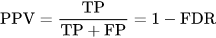

In [31]:
R['PPV'] = R.TP / (R.TP + R.FP)

**F1 score**

The harmonic mean of precision and sensitivity.

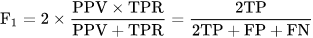

**balanced accuracy (BA)**

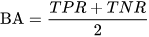

In [32]:
R['BA'] = (R.TPR + R.TNR) / 2

In [33]:
R['F1'] = 2 * ((R.PPV * R.TPR) / (R.PPV + R.TPR))

In [34]:
R

,test_size,a_cut,b_cut,TP,TN,FP,FN,P,N,ACC,TPR,TNR,PPV,BA,F1
mnb,0.25,93,84,3049,2817,139,63,3112,2956,0.966711,0.979756,0.952977,0.956399,0.966366,0.967937


# Explore Model

In [35]:
VOCAB = DTM.loc[X_train.index].sum().to_frame('n').reset_index().rename(columns={'index':'term_str'})
VOCAB[['P','N']] = pd.DataFrame(mnb_engine.feature_count_).T
VOCAB = VOCAB.set_index('term_str')

In [36]:
VOCAB

,n,P,N
term_str,,,
aaron,3,0.0,3.0
abbey,3,0.0,3.0
abbott,3,0.0,3.0
abbreviated,3,3.0,0.0
ability,27,0.0,27.0
...,...,...,...
zippy,28,10.0,18.0
zone,4,1.0,3.0
zweigelt,7,5.0,2.0


In [37]:
VOCAB[['P_ll','N_ll']] = np.log2((VOCAB[['P','N']] + .01) / (VOCAB[['P','N']] + .01).sum())
VOCAB['valence'] = VOCAB.N_ll - VOCAB.P_ll
VOCAB['polarity'] = np.sign(VOCAB.valence)

In [38]:
POS = VOCAB.sort_values('valence', ascending=False).head(20)

In [39]:
POS

,n,P,N,P_ll,N_ll,valence,polarity
term_str,,,,,,,
wonderfully,129,0.0,129.0,-23.932313,-10.985540,12.946773,1.0
superb,112,0.0,112.0,-23.932313,-11.189395,12.742917,1.0
doles,98,0.0,98.0,-23.932313,-11.382022,12.550291,1.0
exceptional,90,0.0,90.0,-23.932313,-11.504866,12.427447,1.0
premier,78,0.0,78.0,-23.932313,-11.711292,12.221021,1.0
framework,71,0.0,71.0,-23.932313,-11.846929,12.085384,1.0
dramatic,70,0.0,70.0,-23.932313,-11.867390,12.064923,1.0
sites,67,0.0,67.0,-23.932313,-11.930575,12.001738,1.0
parcel,60,0.0,60.0,-23.932313,-12.089748,11.842565,1.0


In [40]:
NEG = VOCAB.sort_values('valence', ascending=True).head(20)

In [41]:
NEG

,n,P,N,P_ll,N_ll,valence,polarity
term_str,,,,,,,
everyday,161,161.0,0.0,-9.957450,-24.640735,-14.683285,-1.0
bland,136,136.0,0.0,-10.200888,-24.640735,-14.439848,-1.0
watery,128,128.0,0.0,-10.288344,-24.640735,-14.352392,-1.0
dilute,107,107.0,0.0,-10.546855,-24.640735,-14.093881,-1.0
pickled,106,106.0,0.0,-10.560400,-24.640735,-14.080335,-1.0
weedy,88,88.0,0.0,-10.828861,-24.640735,-13.811874,-1.0
scratchy,86,86.0,0.0,-10.862024,-24.640735,-13.778711,-1.0
mealy,84,84.0,0.0,-10.895967,-24.640735,-13.744768,-1.0
strange,76,76.0,0.0,-11.040339,-24.640735,-13.600396,-1.0


In [42]:
# VOCAB['feature_names'] = mnb_engine.feature_names_in_

In [43]:
VOCAB

,n,P,N,P_ll,N_ll,valence,polarity
term_str,,,,,,,
aaron,3,0.0,3.0,-23.932313,-16.407116,7.525197,1.0
abbey,3,0.0,3.0,-23.932313,-16.407116,7.525197,1.0
abbott,3,0.0,3.0,-23.932313,-16.407116,7.525197,1.0
abbreviated,3,3.0,0.0,-15.698693,-24.640735,-8.942042,-1.0
ability,27,0.0,27.0,-23.932313,-13.241457,10.690855,1.0
...,...,...,...,...,...,...,...
zippy,28,10.0,18.0,-13.965086,-13.826153,0.138933,1.0
zone,4,1.0,3.0,-17.274101,-16.407116,0.866985,1.0
zweigelt,7,5.0,2.0,-14.963646,-16.989684,-2.026038,-1.0


# Save

In [44]:
VOCAB.to_csv("../data/winereviews/winereviews-SKMNB_SALEX.csv")